In [31]:
!pip install bresenham



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: pip install --upgrade pip


In [32]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.pyplot import imshow
from PIL import Image, ImageOps, ImageFilter, ImageEnhance
from tqdm import tqdm
import math
from bresenham import bresenham as line_iter


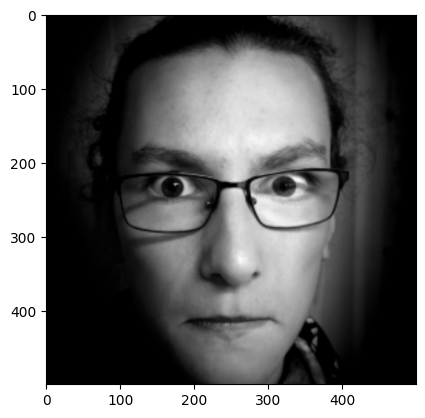

In [33]:
img = cv2.imread("../radim.png")
# k = 0.5
# img = cv2.resize(img, (int(img.shape[1] * k), int(img.shape[0] * k)))
img = cv2.resize(img, (500, 500))
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# cv2.line(img, (140, 140), (140, 140), 255, 150)

orig = img.copy()

canvas = np.full_like(img, 255)
# img_16 = img.astype(np.int16)
# canvas = np.full_like(img, 255)
canvas[0, 0] = 0
canvas[0, 1] = 255

imshow(img, cmap="gray")


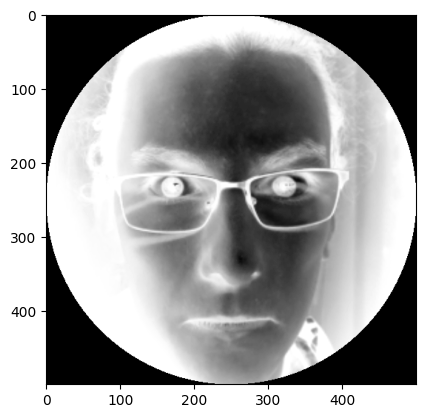

In [34]:
def create_circular_mask(h, w, center=None, radius=None):

    if center is None:  # use the middle of the image
        center = (int(w / 2), int(h / 2))
    if radius is None:  # use the smallest distance between the center and image walls
        radius = min(center[0], center[1], w - center[0], h - center[1])

    Y, X = np.ogrid[:h, :w]
    dist_from_center = np.sqrt((X - center[0]) ** 2 + (Y - center[1]) ** 2)

    mask = dist_from_center <= radius
    return mask


# preprocess
mask = create_circular_mask(img.shape[0], img.shape[1])
imgcircle = img.copy()
imgcircle[~mask] = 255
imginverted = np.full(img.shape, 255) - imgcircle

img = imginverted

imshow(img, cmap="gray")


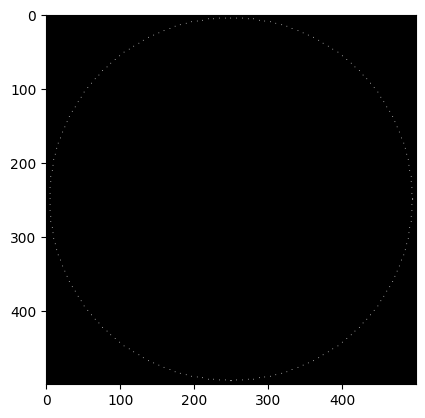

In [35]:
def generate_circle_points(center, radius, n):
    angles = np.linspace(0, 2 * np.pi, n, endpoint=False)
    points = [
        (center[0] + radius * np.cos(angle), center[1] + radius * np.sin(angle))
        for angle in angles
    ]
    return points


center = (img.shape[0] // 2, img.shape[1] // 2)
radius = min(img.shape) // 2 - 5
n = 200
circle_points = generate_circle_points(center, radius, n)

# Plot the points on the image
img_gray = np.full_like(img, 0, dtype=np.uint8)
for point in circle_points:
    img_gray[int(point[1]), int(point[0])] = 255
    cv2.line(
        img_gray, (int(point[1]), int(point[0])), (int(point[1]), int(point[0])), 255, 1
    )

imshow(img_gray, cmap="gray")

spagat = [0]


In [38]:
# for _ in tqdm(range(10000)):
while True:
    from_pos = circle_points[spagat[-1]]
    best = [-1, -math.inf]
    for indx, to_pos in enumerate(circle_points):
        if indx == spagat[-1]:
            continue

        lajna = []

        for x, y in line_iter(
            int(from_pos[0]), int(from_pos[1]), int(to_pos[0]), int(to_pos[1])
        ):
            # print("herke")
            lajna.append(img[y, x])
            # brehem

        # print(lajna)
        lajna = np.array(lajna)

        error = np.sum(lajna)
        # print(error)

        if error > best[1]:
            # print(error, indx)
            best = [indx, error]
            bst = (from_pos, to_pos)
            best_lajna = lajna

        # break

    canvas_w_line = cv2.line(
        np.full_like(canvas, 0),
        tuple(map(int, from_pos)),
        tuple(map(int, circle_points[best[0]])),
        40,
        1,
    )

    canvas = cv2.subtract(canvas, canvas_w_line)
    img = cv2.subtract(img, canvas_w_line, dtype=cv2.CV_8U)

    spagat.append(best[0])
    start = best[0]

    print(np.mean(canvas))
    if np.mean(canvas) < 127:
        break


165.34334
165.32026
165.24936
165.20732
165.16608
165.11906
165.06662
165.03924
164.97014
164.94056
164.8908
164.8708
164.80388
164.76434
164.73702
164.69012
164.65084
164.61036
164.58172
164.5282
164.48664
164.4338
164.38144
164.34636
164.27608
164.24004
164.20758
164.1784
164.11162
164.04596
164.0095
163.97572
163.91044
163.88848
163.8153
163.74592
163.70648
163.68124
163.61246
163.56624
163.49304
163.44622
163.40114
163.32806
163.26084
163.22004
163.1858
163.12688
163.0708
163.0254
162.97188
162.90016
162.83618
162.80246
162.76358
162.71664
162.65694
162.60338
162.56828
162.52432
162.50128
162.47236
162.40918
162.3413
162.27496
162.21264
162.18728
162.15162
162.08112
162.0307
162.00342
161.93316
161.89066
161.85884
161.7847
161.76502
161.71214
161.65992
161.61924
161.57588
161.55364
161.48634
161.44504
161.41516
161.3732
161.3528
161.31904
161.2666
161.22886
161.16342
161.10752
161.04262
161.01638
160.94686
160.89658
160.82914
160.76068
160.69298
160.66522
160.60838
160.5708
160.511

165.37794


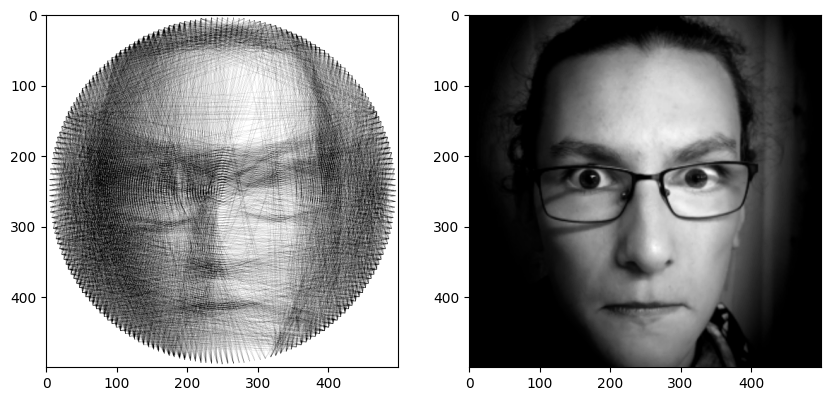

In [37]:
print(np.mean(canvas))
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
imshow(
    canvas,
    cmap="gray",
)
plt.subplot(1, 2, 2)
imshow(orig, cmap="gray")
